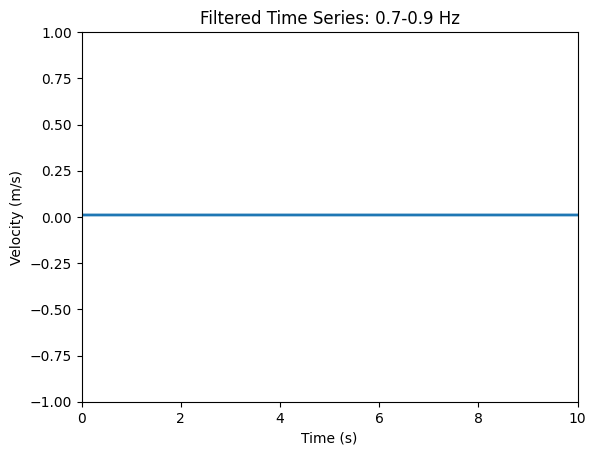

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from obspy import Stream, read
import glob


mseed_files = sorted(glob.glob('./data/lunar/training/data/S12_GradeA/*.mseed'))
def load_mseed(file_idx):
    st = read(mseed_files[file_idx])
    return st, mseed_files[file_idx]

st, filename = load_mseed(0)

# Assuming `st` is your Stream object and `sampling_rate` is known
# Generate a list of frequency ranges for the animation
freq_ranges = [(0.1 + i*0.1, 0.3 + i*0.1) for i in range(10)] + [(0.7, 0.9)]  # Forward and back step
duration = 2  # Total animation duration in seconds
interval = duration * 1000 // len(freq_ranges)  # Time for each frame in ms

# Set up the figure and axis for the plot
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)  # Empty line object to update
ax.set_xlim([0, 10])  # Adjust these limits according to your time range
ax.set_ylim([-1, 1])  # Since data is normalized between -1 and 1
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
title = ax.set_title('')

# This function will update the plot for each frame in the animation
def update(frame):
    # Copy the original trace for filtering
    st_filt = st.copy()
    
    # Get the current frequency range
    f_min, f_max = freq_ranges[frame]

    # Apply bandpass filter for the current frequency range
    st_filt.filter('bandpass', freqmin=f_min, freqmax=f_max)
    
    # Extract filtered trace data
    tr_filt = st_filt.traces[0].copy()
    tr_times_filt = tr_filt.times()
    tr_data_filt = tr_filt.data

    # Normalize tr_data_filt between -1 and 1
    tr_data_filt = 2 * (tr_data_filt - np.min(tr_data_filt)) / (np.max(tr_data_filt) - np.min(tr_data_filt)) - 1
    
    # Update the line data for the current frame
    line.set_data(tr_times_filt, tr_data_filt)

    # Update the title with the current frequency range
    title.set_text(f'Filtered Time Series: {f_min:.1f}-{f_max:.1f} Hz')

    return line, title

# Create the animation
ani = FuncAnimation(fig, update, frames=len(freq_ranges), interval=interval, blit=True)

# To display the animation inline if in Jupyter Notebook, uncomment below line
# from IPython.display import HTML
# HTML(ani.to_jshtml())


# Save the animation to a GIF file using the 'pillow' writer
ani.save("frequency_animation.gif", writer='pillow')

# Show the animation in a window
plt.show()
